## Loading Data

In [1]:
from data_loading import load_data

df = load_data("house_price.xlsx")
df.head(8)


,Property ID,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Date Sold,Price
0,SI_000001,CityA,3974.0,2.0,2.0,2007.0,Good,Single Family,2020-11-02,324000.0
1,SI_000002,CityA,1660.0,2.0,3.0,1934.0,Good,Single Family,2022-10-23,795000.0
2,SI_000003,CityC,2094.0,2.0,2.0,1950.0,Good,Single Family,2020-11-30,385000.0
3,SI_000004,CityB,1930.0,2.0,3.0,1905.0,Good,Single Family,2021-12-09,651000.0
4,SI_000005,CityB,1895.0,5.0,2.0,1936.0,New,Single Family,2024-10-30,1878000.0
5,SI_000006,CityB,3892.0,2.0,3.0,1904.0,Poor,Single Family,2020-05-16,213000.0
6,SI_000007,CityA,2438.0,3.0,2.0,1955.0,Fair,Single Family,2022-01-12,417000.0
7,SI_000008,CityA,2969.0,4.0,1.0,1958.0,Good,Single Family,2024-08-09,621000.0


In [2]:
#!pip install scikit-learn


## Preprocessing and Encoding 

In [3]:
from data_loading import load_data
from preprocessing import preprocess_data

df = load_data("house_price.xlsx")

X, y, preprocessor = preprocess_data(df)

print(X.shape)
print(y.shape)
print(X.columns)


(241735, 9)
(241735,)
Index(['Location', 'Size', 'Bedrooms', 'Bathrooms', 'Year Built', 'Condition',
       'Type', 'sold_year', 'sold_month'],
      dtype='object')


In [5]:
print(X.shape)
print(X.columns)
print(y.isna().sum())  # should be 0


(241735, 9)
Index(['Location', 'Size', 'Bedrooms', 'Bathrooms', 'Year Built', 'Condition',
       'Type', 'sold_year', 'sold_month'],
      dtype='object')
0


## EDA


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247172 entries, 0 to 247171
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Property ID  247172 non-null  object        
 1   Location     247172 non-null  object        
 2   Size         244701 non-null  float64       
 3   Bedrooms     238769 non-null  float64       
 4   Bathrooms    240499 non-null  float64       
 5   Year Built   234567 non-null  float64       
 6   Condition    236544 non-null  object        
 7   Type         247172 non-null  object        
 8   Date Sold    247172 non-null  datetime64[ns]
 9   Price        241735 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 18.9+ MB
None

--- Statistical Summary ---
                Size       Bedrooms      Bathrooms     Year Built  \
count  244701.000000  238769.000000  240499.000000  234567.000000   
mean     2402.547664   

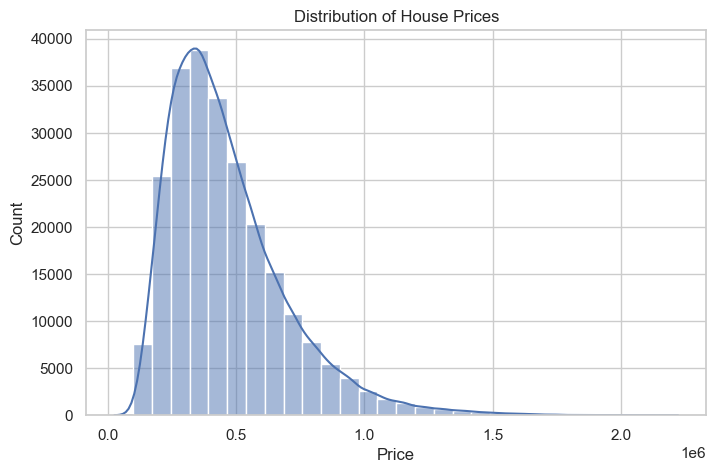

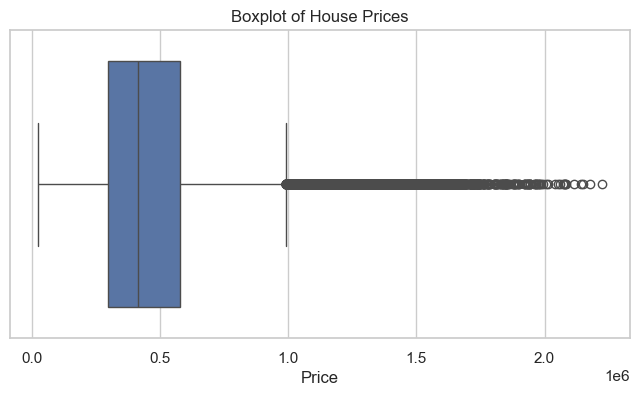

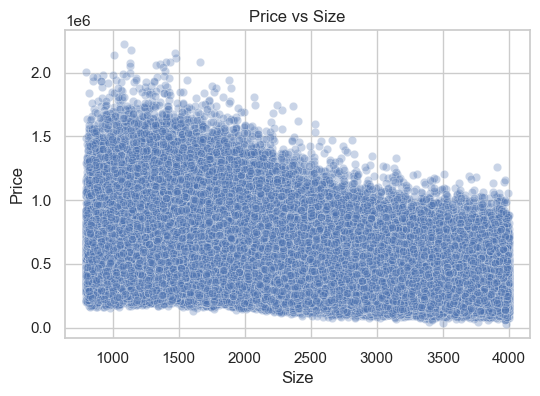

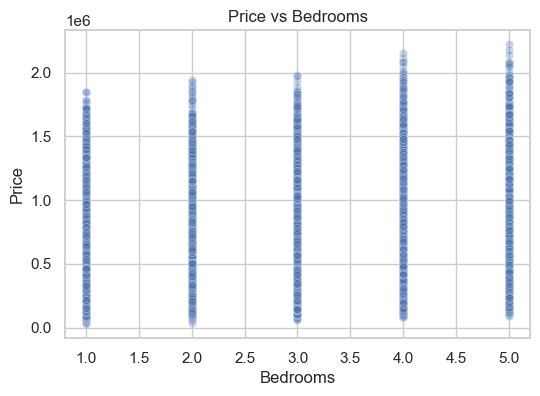

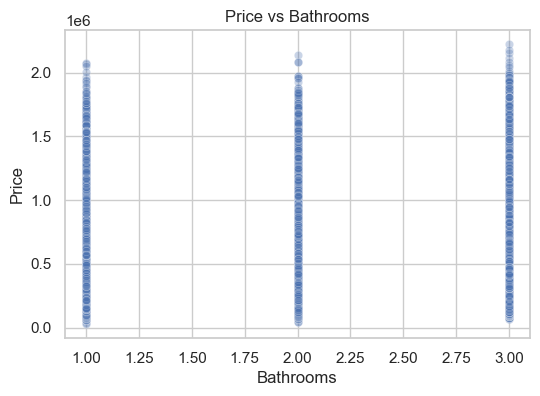

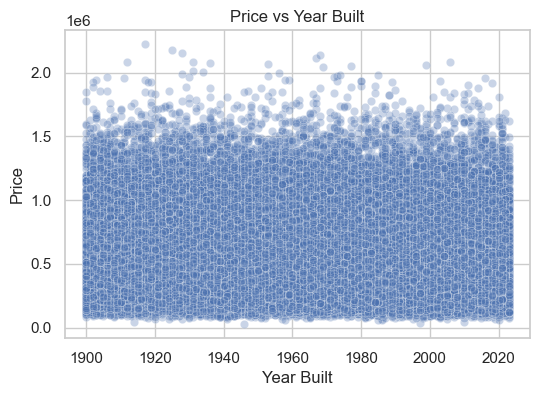

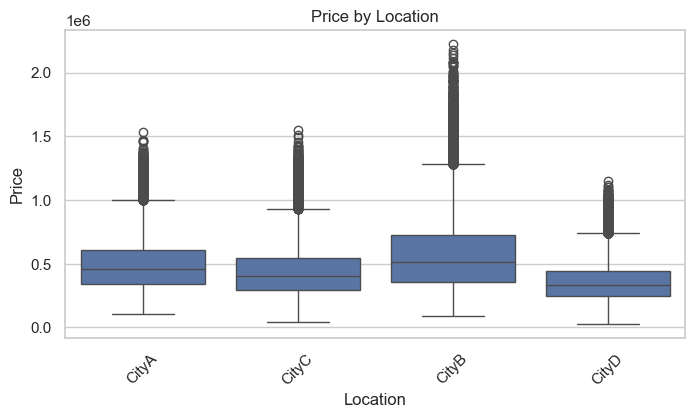

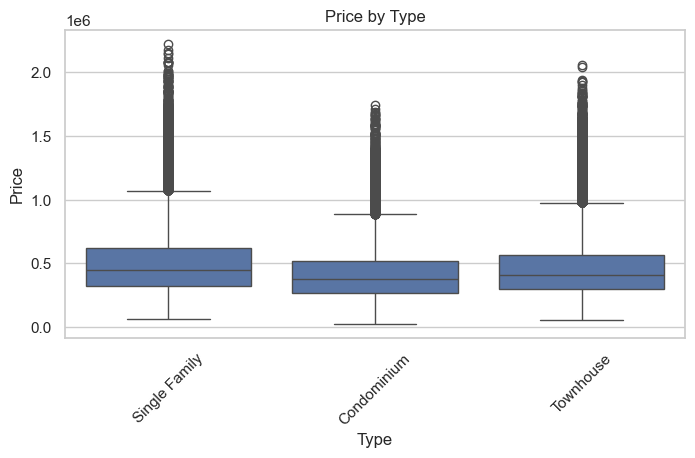

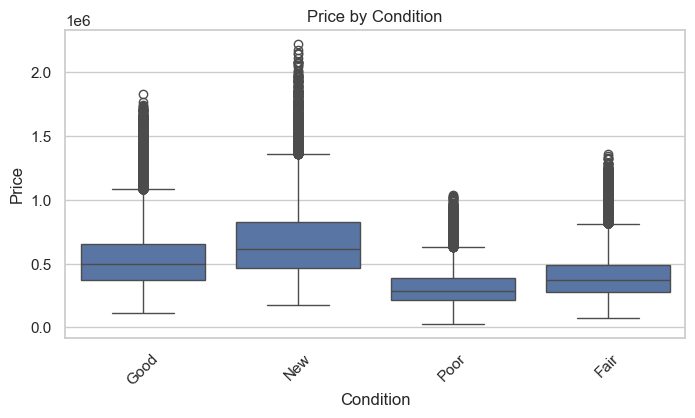

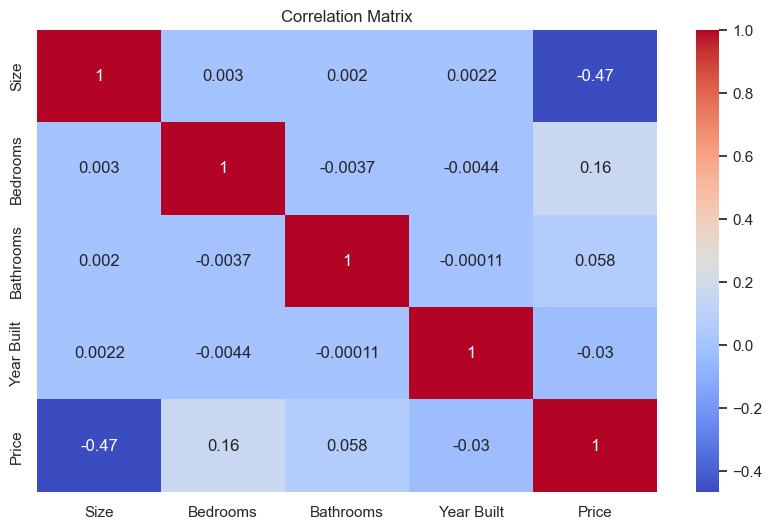

In [6]:
from data_loading import load_data
from eda import perform_eda

df = load_data("house_price.xlsx")
perform_eda(df)


## Training Models

In [7]:
from data_loading import load_data
from preprocessing import preprocess_data
from training import train_model

#df = load_data("house_price.xlsx")
#X, y, preprocessor = preprocess_data(df)

best_model, best_model_name, X_test, y_test = train_model(X, y, preprocessor)

print("Selected Model:", best_model_name)



Linear Regression Performance:
RMSE: 145109.01
MAE : 109700.31
R2  : 0.6015


C:\Anaconda3\envs\DSWH\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
2 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Anaconda3\envs\DSWH\Lib\site-packages\joblib\_utils.py", line 109, in __call__
    return self.func(**kwargs)
           ~~~~~~~~~^^^^^^^^^^
  File "C:\Anaconda3\envs\DSWH\Lib\site-packages\joblib\parallel.py", line 607, in __call__
    return [func(*args, **kwargs) for func, args, kwargs in self.items]
            ~~~~^^^^^^^^^^^^^^^^^
  File "C:\Anaconda3\envs\DSWH\Lib\site-packages\sklearn\utils\parallel.


Random Forest Performance:
RMSE: 139127.23
MAE : 104440.33
R2  : 0.6337

Gradient Boosting Performance:
RMSE: 137287.01
MAE : 103133.44
R2  : 0.6433

Final selected model: Gradient Boosting
Best model saved as models/house_price_model.joblib
Selected Model: Gradient Boosting


## Evaluation of Model after Training

In [13]:
from evaluation import evaluate

metrics = evaluate(best_model, X_test, y_test)
print(metrics)

RMSE: 137287.01
MAE: 103133.44
R2: 0.643
(np.float64(137287.0057198419), 103133.44087294188, 0.6433448225385204)


## Load saved model and evaluate 

In [14]:
from joblib import load
from evaluation import evaluate

model = load("models/house_price_model.joblib")
evaluate(model, X_test, y_test)


RMSE: 137287.01
MAE: 103133.44
R2: 0.643


(np.float64(137287.0057198419), 103133.44087294188, 0.6433448225385204)

## Inference

In [15]:
from inference import predict

sample_input = {
    "Location": "Downtown",
    "Size": 1200,
    "Bedrooms": 3,
    "Bathrooms": 2,
    "Year Built": 2015,
    "Condition": "Good",
    "Type": "Apartment",
    "sold_year": 2023,
    "sold_month": 6
}

price = predict(sample_input)
print("Predicted Price:", price)


Predicted Price: 649664.7910195418


In [16]:
import sys
sys.executable


'C:\\Anaconda3\\envs\\DSWH\\python.exe'

In [ ]:
1stop_AI/House Price Prediction/

In [ ]:
cd "C:\Users\VAIBHAV KUMAR PATEL\1stop_AI\House Price Prediction"
